![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

## [ ] Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [164]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 10)

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
...,...,...
WI,4.554,106.62
WY,5.568,122.04


## `KMeans()` Model in Python

### Fit the Model

In [165]:
from sklearn.cluster import KMeans

In [166]:
model_km = KMeans(n_clusters=3)

In [167]:
model_km.fit(X=df_crashes)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [168]:
df_scaled

,alcohol,ins_losses
abbrev,,
AL,0.479218,0.556369
AK,0.347188,0.456842
...,...,...
WI,0.350622,0.213068
WY,0.470693,0.350710


### Calculate Predictions

In [169]:
model_km.predict(X)

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1])

### Create a New DataFrame for the Predictions

In [170]:
df_predict = df_crashes.copy()

In [171]:
df_predict['predict_km']= model_km.predict(X)
df_predict

,alcohol,ins_losses,predict_km
abbrev,,,
AL,5.640,145.08,2
AK,4.525,133.93,2
...,...,...,...
WI,4.554,106.62,1
WY,5.568,122.04,1


### Visualize the Model

<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

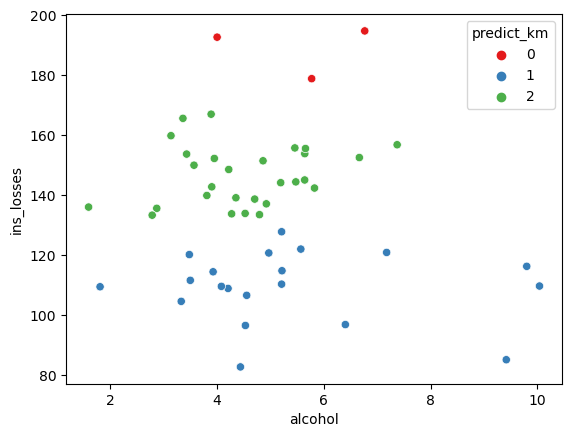

In [172]:
sns.scatterplot(data=df_predict, x='alcohol', y='ins_losses', hue='predict_km',palette='Set1')

### [ ] Model Interpretation

In [173]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### The Need for Scaling the Data

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

## [ ] `MinMaxScaler()` the data

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler()

In [176]:
data = scaler.fit_transform(X=df_crashes)

In [177]:
df_scaled = pd.DataFrame(data= data, columns=df_crashes.columns, index=df_crashes.index)

## [ ] `KMeans()` Model with *Scaled Data*

In [178]:
model_kn_scaled = KMeans(n_clusters=3)

In [179]:
model_kn_scaled.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [180]:
df_predict['predict_km_scaled']= model_kn_scaled.predict(X=df_scaled)
df_predict

,alcohol,ins_losses,predict_km,predict_km_scaled
abbrev,,,,
AL,5.640,145.08,2,1
AK,4.525,133.93,2,0
...,...,...,...,...
WI,4.554,106.62,1,0
WY,5.568,122.04,1,0


In [181]:
model_km.inertia_

5560.226770514284

In [182]:
model_km.score(X)

-5560.226770514284

In [212]:
df_predict

,alcohol,ins_losses,predict_km,predict_km_scaled,predit_ac,predict_ac,predict_sc_
abbrev,,,,,,,
AL,5.640,145.08,2,1,0,0,0
AK,4.525,133.93,2,0,0,0,2
...,...,...,...,...,...,...,...
WI,4.554,106.62,1,0,1,1,2
WY,5.568,122.04,1,0,1,1,2


<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

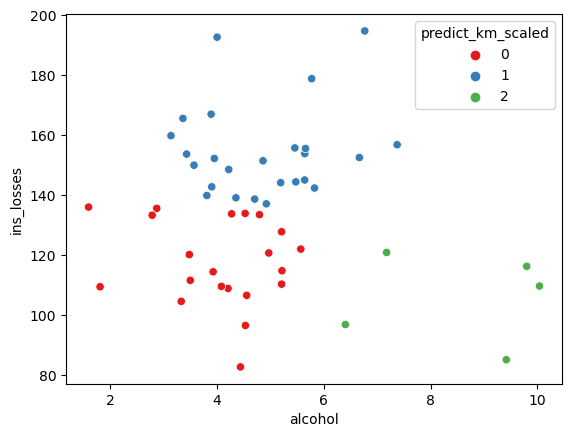

In [213]:
sns.scatterplot(data=df_predict, x='alcohol', y='ins_losses', hue='predict_km_scaled',palette='Set1')

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

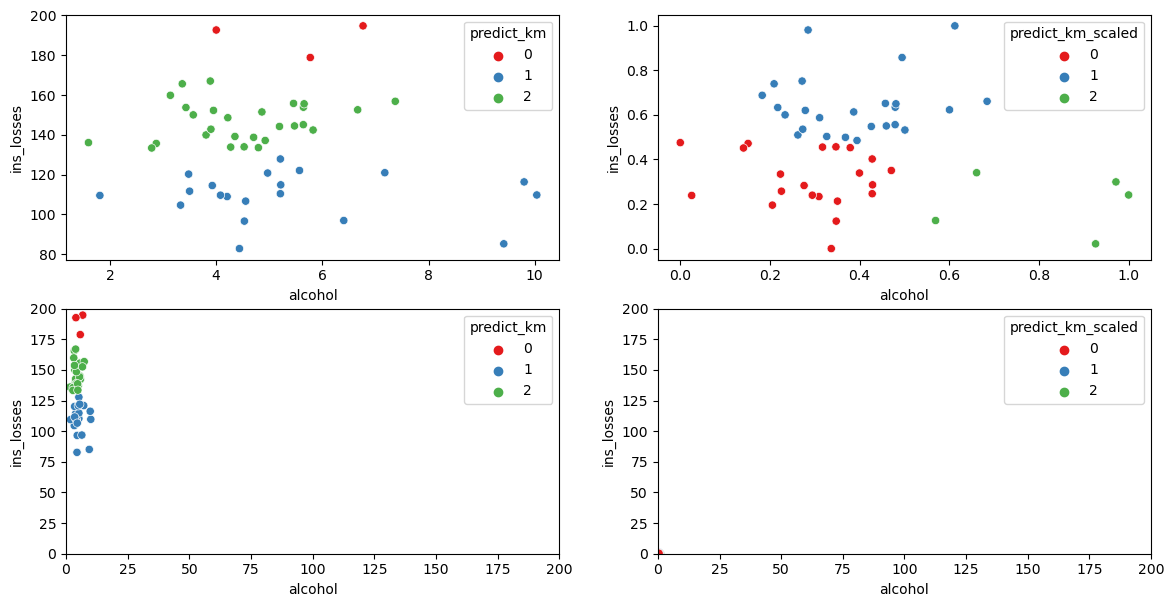

In [187]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_km',
                data=df_predict, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_predict.predict_km_scaled,
                data=df_scaled, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_km',
                data=df_predict, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_predict.predict_km_scaled,
                data=df_scaled, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200);

### Model Interpretation

## [ ] Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomerative Clustering

#### Fit the Model

In [188]:
from sklearn.cluster import AgglomerativeClustering

In [191]:
model_ac = AgglomerativeClustering(n_clusters=3)

In [192]:
model_ac.fit(X=df_scaled)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [193]:
model_ac.fit_predict(X=df_scaled)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Create a New Column for the Predictions

In [197]:
df_predict['predict_ac']=model_ac.fit_predict(X=df_scaled)
df_predict

,alcohol,ins_losses,predict_km,predict_km_scaled,predit_ac,predict_ac
abbrev,,,,,,
AL,5.640,145.08,2,1,0,0
AK,4.525,133.93,2,0,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,1,0,1,1
WY,5.568,122.04,1,0,1,1


#### Visualize the Model

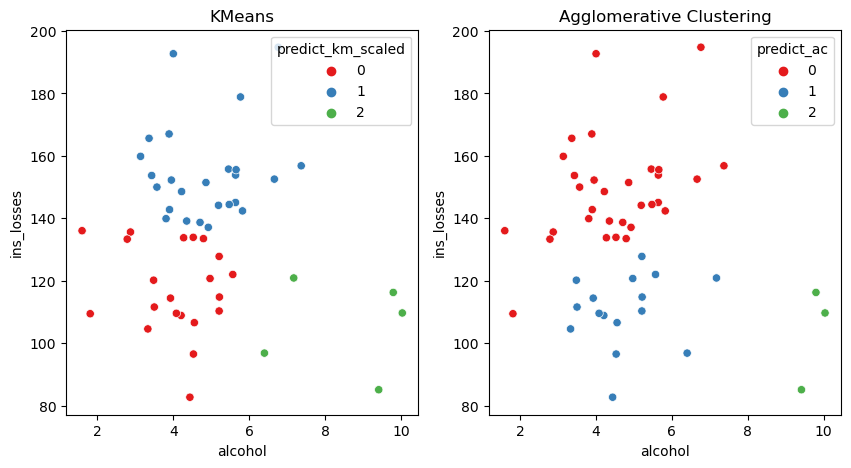

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_km_scaled',
                data=df_predict, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_ac',
                data=df_predict, palette='Set1', ax=ax2);

ax1.set_title('KMeans')
ax2.set_title('Agglomerative Clustering');

### Spectral Clustering

#### Fit the Model

In [199]:
from sklearn.cluster import SpectralClustering

In [208]:
model_sc = SpectralClustering(n_clusters=3)

In [209]:
model_sc.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SpectralClustering(n_clusters=3)

#### Calculate Predictions

#### Create a New Column for the Predictions

In [210]:
df_predict['predict_sc_'] = model_sc.fit_predict(X=df_scaled)
df_predict.drop(columns='predit_ac')

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,alcohol,ins_losses,predict_km,predict_km_scaled,predict_ac,predict_sc_
abbrev,,,,,,
AL,5.640,145.08,2,1,0,0
AK,4.525,133.93,2,0,0,2
...,...,...,...,...,...,...
WI,4.554,106.62,1,0,1,2
WY,5.568,122.04,1,0,1,2


#### Visualize the Model

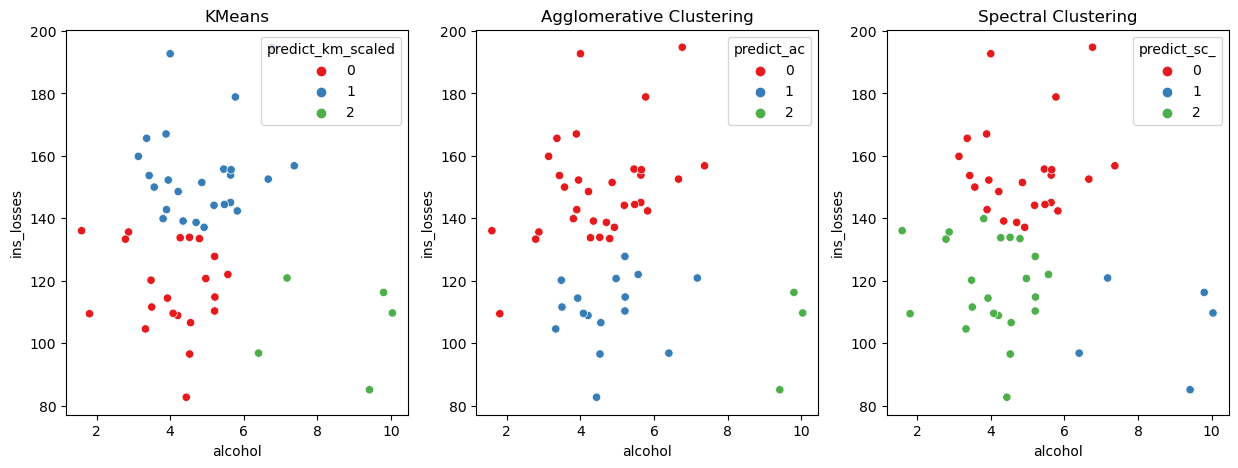

In [211]:
ictfig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_km_scaled',
                data=df_predict, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_ac',
                data=df_predict, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='predict_sc_',
                data=df_predict, palette='Set1', ax=ax3);

## [ ] Practical Use Case Conclusion

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.